# Load and Explore OSM Data for Kampala

This notebook helps with visualizing building footprints, roads, and key public services in Kawempe, Kampala, Uganda downloaded from https://overpass-turbo.eu/

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt

## Get GeoJSON data

In [2]:
import geopandas as gpd

# Load from the raw data folder
buildings = gpd.read_file("../data/raw/kawempe_buildings.geojson")
roads = gpd.read_file("../data/raw/kawempe_highways.geojson")
services = gpd.read_file("../data/raw/kawempe_services.geojson")


## Visualize buildings, roads and services

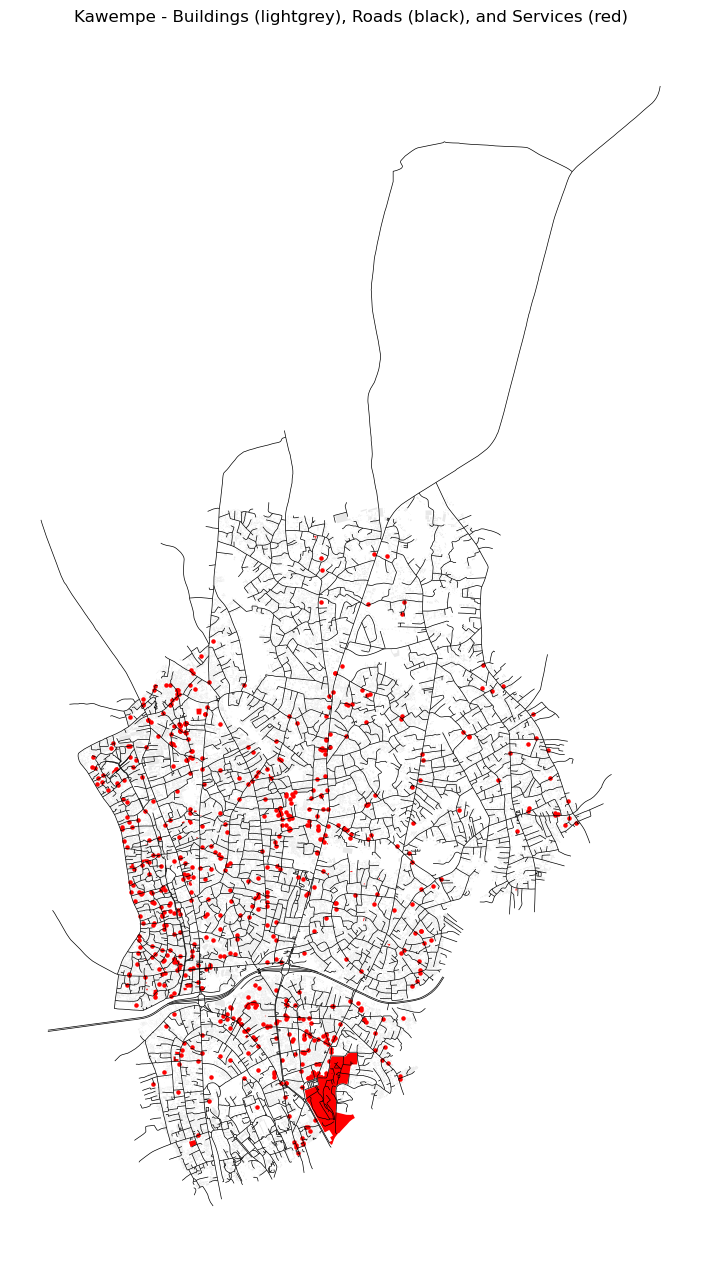

In [17]:
fig, ax = plt.subplots(figsize=(10, 16))
buildings.plot(ax=ax, color="lightgrey", alpha=0.5)
roads.plot(ax=ax, color="black", linewidth=0.5)
services.plot(ax=ax, color="red", markersize=5)
plt.title("Kawempe - Buildings (lightgrey), Roads (black), and Services (red)")
plt.axis("off")
plt.show()

fig.savefig("../visualizations/kawempe_bldgs_roads_services.png", dpi=300)


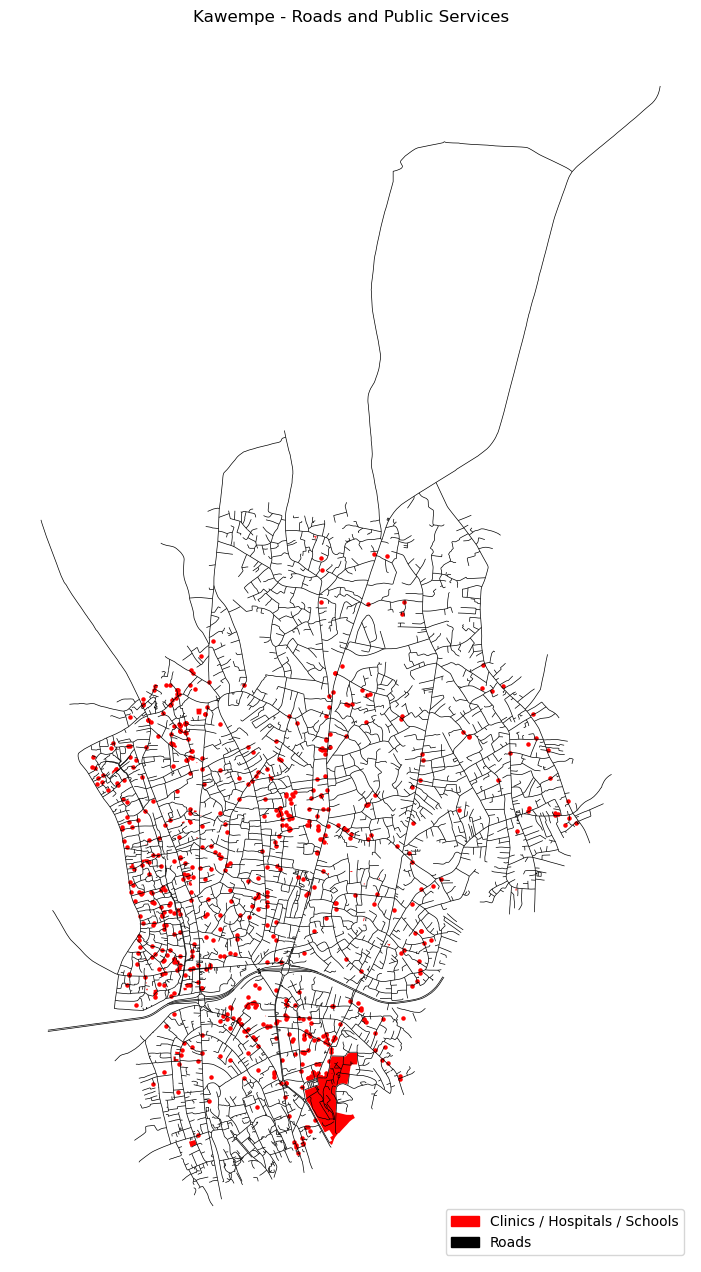

In [16]:
import matplotlib.patches as mpatches

fig, ax = plt.subplots(figsize=(10, 16))

roads.plot(ax=ax, color="black", linewidth=0.5)
services.plot(ax=ax, color="red", markersize=5)

# Legend manually
red_patch = mpatches.Patch(color='red', label='Clinics / Hospitals / Schools')
black_patch = mpatches.Patch(color='black', label='Roads')
plt.legend(handles=[red_patch, black_patch], loc='lower right')

plt.title("Kawempe - Roads and Public Services")
plt.axis("off")
plt.show()

fig.savefig("../visualizations/kawempe_road_services.png", dpi=300)


## Adding labels to service points (clinic, hospital, schools)

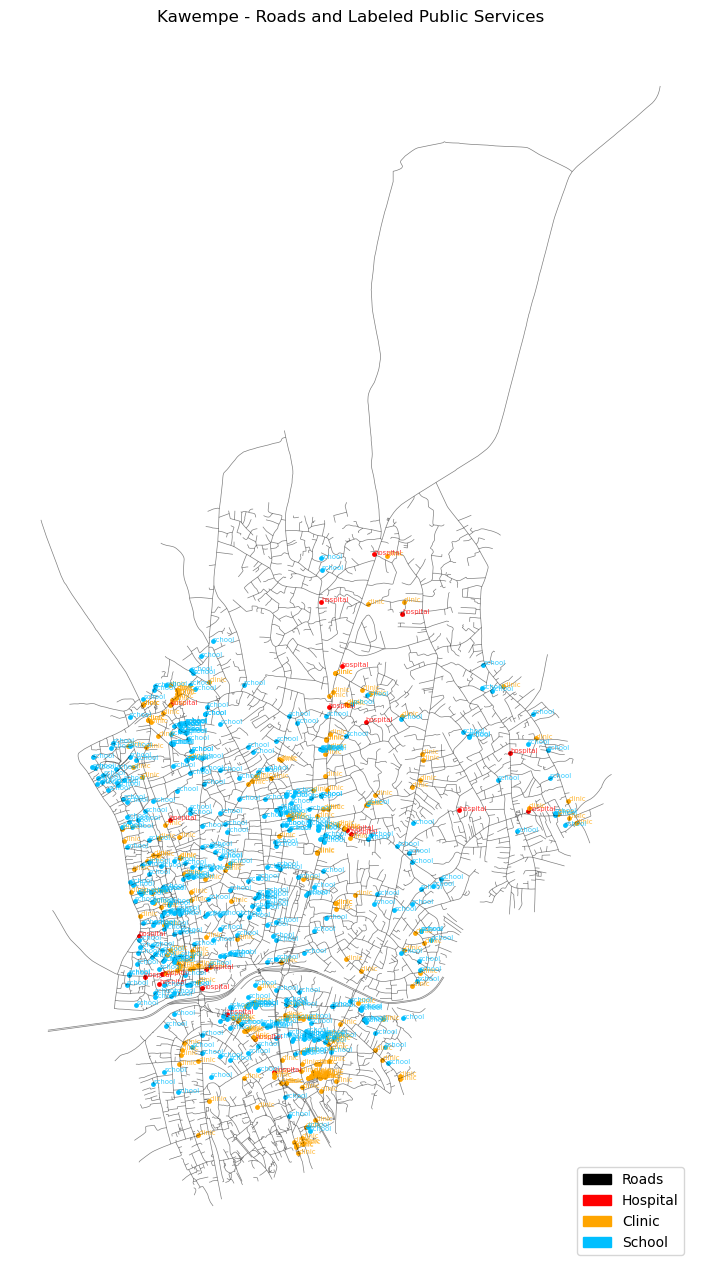

In [18]:
# Filter to only Point geometries
services_points = services[services.geometry.type == "Point"]

# Create base plot
fig, ax = plt.subplots(figsize=(10, 16))
roads.plot(ax=ax, color="black", linewidth=0.5, alpha=0.5)

# Plot and label each amenity type using high-contrast colors
amenity_colors = {
    "hospital": "red",
    "clinic": "orange",
    "school": "deepskyblue"
}

for amenity, color in amenity_colors.items():
    subset = services_points[services_points["amenity"] == amenity]
    subset.plot(ax=ax, color=color, markersize=6, label=amenity)
    for x, y in zip(subset.geometry.x, subset.geometry.y):
        ax.text(x, y, amenity, fontsize=5, color=color, alpha=0.8)

# Custom legend patches
import matplotlib.patches as mpatches
legend_patches = [
    mpatches.Patch(color='black', label='Roads'),
    mpatches.Patch(color='red', label='Hospital'),
    mpatches.Patch(color='orange', label='Clinic'),
    mpatches.Patch(color='deepskyblue', label='School'),
]
plt.legend(handles=legend_patches, loc='lower right')

plt.title("Kawempe - Roads and Labeled Public Services")
plt.axis("off")
plt.show()

fig.savefig("../visualizations/kawempe_road_services_separate.png", dpi=300)
